In [1]:
from db import *
from datetime import datetime, timedelta
from dataclasses import dataclass, field

In [12]:
class SensorData(object):
    def __init__(self):
        # ---- Device query ----
        self.query_device = session.query(DeviceInfo.device)
    
    def temperature(self, since):
        tp = TemperaturePackage
        sq_temperature = session.query(tp.device, tp.temperature, tp.unit, tp.timestamp) \
                                .filter(tp.timestamp >= since) \
                                .order_by(tp.temperature) \
                                .subquery()

        return self.query_device \
                   .outerjoin(sq_temperature, DeviceInfo.device == sq_temperature.c.device) \
                   .add_columns(sq_temperature.c.temperature, sq_temperature.c.unit, sq_temperature.c.timestamp) \
                   .order_by(DeviceInfo.device) \
                   .order_by(sq_temperature.c.timestamp) \
                   .all()

In [13]:
since = datetime.now() - timedelta(days=5)
temp = SensorData().temperature(since)

In [14]:
temp

[('PTL_LT_AT_001', None, None, None),
 ('PTL_LT_AT_002', 25.04, '°C', datetime.datetime(2020, 2, 7, 9, 37, 44)),
 ('PTL_LT_AT_002', 25.06, '°C', datetime.datetime(2020, 2, 7, 9, 37, 54)),
 ('PTL_LT_AT_002', 25.07, '°C', datetime.datetime(2020, 2, 7, 9, 38, 11)),
 ('PTL_LT_AT_002', 25.09, '°C', datetime.datetime(2020, 2, 7, 9, 38, 12)),
 ('PTL_LT_AT_002', 25.1, '°C', datetime.datetime(2020, 2, 7, 9, 38, 17)),
 ('PTL_LT_AT_002', 25.12, '°C', datetime.datetime(2020, 2, 7, 9, 38, 23)),
 ('PTL_LT_AT_002', 25.13, '°C', datetime.datetime(2020, 2, 7, 9, 38, 27)),
 ('PTL_LT_AT_002', 25.15, '°C', datetime.datetime(2020, 2, 7, 9, 38, 31)),
 ('PTL_LT_AT_002', 25.16, '°C', datetime.datetime(2020, 2, 7, 9, 38, 36)),
 ('PTL_LT_AT_002', 25.18, '°C', datetime.datetime(2020, 2, 7, 9, 38, 43)),
 ('PTL_LT_AT_002', 25.19, '°C', datetime.datetime(2020, 2, 7, 9, 38, 47)),
 ('PTL_LT_AT_002', 25.2, '°C', datetime.datetime(2020, 2, 7, 9, 38, 53)),
 ('PTL_LT_AT_002', 25.21, '°C', datetime.datetime(2020, 2, 7, 9,

In [23]:
import pandas as pd

In [76]:
import humanfriendly

In [75]:
data = pd.DataFrame(temp)
data = data.set_index(['device', data.index])
df = data.loc['PTL_LT_AT_001']
df = df.sort_values(by=['timestamp'])
df[['timestamp', 'temperature']].dropna()

,timestamp,temperature


In [80]:
humanfriendly.datetime.datetime(since.timestamp())

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/huss/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-80-b9d91b0cc0ff>", line 1, in <module>
    humanfriendly.datetime.datetime(since.timestamp())
TypeError: integer argument expected, got float

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/huss/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/huss/.local/lib/python3.6/site-packages/IPython/core/ultratb.py", line 1151, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/home/

TypeError: integer argument expected, got float

,temperature,unit,timestamp
54591,28.58,°C,2020-02-05 16:00:02
54592,28.59,°C,2020-02-05 16:00:06
54593,28.60,°C,2020-02-05 16:00:21
54594,28.62,°C,2020-02-05 16:00:27
54595,28.63,°C,2020-02-05 16:00:30
54596,28.65,°C,2020-02-05 16:00:34
54597,28.66,°C,2020-02-05 16:00:39
54598,28.68,°C,2020-02-05 16:00:43
54599,28.70,°C,2020-02-05 16:00:47
54600,28.72,°C,2020-02-05 16:00:51


,temperature,unit,timestamp
54591,28.58,°C,2020-02-05 16:00:02
54592,28.59,°C,2020-02-05 16:00:06
54593,28.60,°C,2020-02-05 16:00:21
54594,28.62,°C,2020-02-05 16:00:27
54595,28.63,°C,2020-02-05 16:00:30
54596,28.65,°C,2020-02-05 16:00:34
54597,28.66,°C,2020-02-05 16:00:39
54598,28.68,°C,2020-02-05 16:00:43
54599,28.70,°C,2020-02-05 16:00:47
54600,28.72,°C,2020-02-05 16:00:51


In [52]:
data.iloc[data.index.get_level_values('device') == 'PTL_RD_ES_012']

temperature unit           timestamp
device                                                   
PTL_RD_ES_012 54591        28.58   °C 2020-02-05 16:00:02
              54592        28.59   °C 2020-02-05 16:00:06
              54593        28.60   °C 2020-02-05 16:00:21
              54594        28.62   °C 2020-02-05 16:00:27
              54595        28.63   °C 2020-02-05 16:00:30
              54596        28.65   °C 2020-02-05 16:00:34
              54597        28.66   °C 2020-02-05 16:00:39
              54598        28.68   °C 2020-02-05 16:00:43
              54599        28.70   °C 2020-02-05 16:00:47
              54600        28.72   °C 2020-02-05 16:00:51
              54601        28.74   °C 2020-02-05 16:00:59
              54602        28.75   °C 2020-02-05 16:01:04
              54603        28.77   °C 2020-02-05 16:01:08
              54604        28.78   °C 2020-02-05 16:01:11
              54605        28.79   °C 2020-02-05 16:01:17
              54606        28.81   °C 2020-02-05 16:01:25
              54607        28.82   °C 2020-02-05 16:01:33
              54608        28.83   °C 2020-02-05 16:01:39
              54609        28.84   °C 2020-02-05 16:01:45
              54610        28.85   °C 2020-02-05 16:01:49
              54611        28.86   °C 2020-02-05 16:01:58
              54612        28.87   °C 2020-02-05 16:02:08
              54613        28.88   °C 2020-02-05 16:02:29
              54614        28.89   °C 2020-02-05 16:02:52
              54615        28.90   °C 2020-02-05 16:03:02
              54616        28.91   °C 2020-02-05 16:03:20
              54617        28.92   °C 2020-02-05 16:03:42
              54618        28.93   °C 2020-02-05 16:04:20
              54619        28.94   °C 2020-02-05 16:04:48
              54620        28.93   °C 2020-02-05 16:05:32
...                          ...  ...                 ...
              55249        28.50   °C 2020-02-06 13:50:44
              55250        28.51   °C 2020-02-06 13:51:16
              55251        28.52   °C 2020-02-06 13:51:52
              55252        28.53   °C 2020-02-06 13:52:20
              55253        28.54   °C 2020-02-06 13:52:50
              55254        28.55   °C 2020-02-06 13:54:01
              55255        28.56   °C 2020-02-06 13:54:41
              55256        28.57   °C 2020-02-06 13:55:23
              55257        28.58   °C 2020-02-06 13:56:19
              55258        28.59   °C 2020-02-06 13:57:01
              55259        28.60   °C 2020-02-06 13:58:59
              55260        28.61   °C 2020-02-06 14:00:59
              55261        28.62   °C 2020-02-06 14:02:38
              55262        28.61   °C 2020-02-06 14:02:50
              55263        28.62   °C 2020-02-06 14:03:00
              55264        28.61   °C 2020-02-06 14:04:14
              55265        28.77   °C 2020-02-06 16:00:35
              55266        28.76   °C 2020-02-06 16:02:30
              55267        28.77   °C 2020-02-06 16:05:15
              55268        28.85   °C 2020-02-06 16:07:10
              55269        28.86   °C 2020-02-06 16:07:17
              55270        28.87   °C 2020-02-06 16:07:34
              55271        28.89   °C 2020-02-06 16:07:39
              55272        28.91   °C 2020-02-06 16:07:46
              55273        28.92   °C 2020-02-06 16:07:51
              55274        28.93   °C 2020-02-06 16:07:57
              55275        28.95   °C 2020-02-06 16:08:07
              55276        28.96   °C 2020-02-06 16:08:12
              55277        28.97   °C 2020-02-06 16:08:16
              55278        28.98   °C 2020-02-06 16:08:21

[688 rows x 3 columns]

temperature  unit           timestamp
device                                                    
PTL_LT_AT_001 0              NaN  None                 NaT
PTL_LT_AT_002 1            25.04    °C 2020-02-07 09:37:44
              2            25.06    °C 2020-02-07 09:37:54
              3            25.07    °C 2020-02-07 09:38:11
              4            25.09    °C 2020-02-07 09:38:12
              5            25.10    °C 2020-02-07 09:38:17
              6            25.12    °C 2020-02-07 09:38:23
              7            25.13    °C 2020-02-07 09:38:27
              8            25.15    °C 2020-02-07 09:38:31
              9            25.16    °C 2020-02-07 09:38:36
              10           25.18    °C 2020-02-07 09:38:43
              11           25.19    °C 2020-02-07 09:38:47
              12           25.20    °C 2020-02-07 09:38:53
              13           25.21    °C 2020-02-07 09:39:07
              14           25.22    °C 2020-02-07 09:39:23
              15           25.23    °C 2020-02-07 09:39:35
              16           25.24    °C 2020-02-07 09:39:49
              17           25.25    °C 2020-02-07 09:39:52
              18           25.26    °C 2020-02-07 09:40:00
              19           25.27    °C 2020-02-07 09:40:11
              20           25.28    °C 2020-02-07 09:40:16
              21           25.29    °C 2020-02-07 09:40:44
              22           25.30    °C 2020-02-07 09:40:52
              23           25.29    °C 2020-02-07 09:40:55
              24           25.28    °C 2020-02-07 09:40:57
              25           25.29    °C 2020-02-07 09:41:29
              26           25.30    °C 2020-02-07 09:41:51
              27           25.22    °C 2020-02-07 09:43:49
              28           25.23    °C 2020-02-07 09:43:50
              29           25.25    °C 2020-02-07 09:44:08
...                          ...   ...                 ...
PTL_RD_ES_012 55249        28.50    °C 2020-02-06 13:50:44
              55250        28.51    °C 2020-02-06 13:51:16
              55251        28.52    °C 2020-02-06 13:51:52
              55252        28.53    °C 2020-02-06 13:52:20
              55253        28.54    °C 2020-02-06 13:52:50
              55254        28.55    °C 2020-02-06 13:54:01
              55255        28.56    °C 2020-02-06 13:54:41
              55256        28.57    °C 2020-02-06 13:55:23
              55257        28.58    °C 2020-02-06 13:56:19
              55258        28.59    °C 2020-02-06 13:57:01
              55259        28.60    °C 2020-02-06 13:58:59
              55260        28.61    °C 2020-02-06 14:00:59
              55261        28.62    °C 2020-02-06 14:02:38
              55262        28.61    °C 2020-02-06 14:02:50
              55263        28.62    °C 2020-02-06 14:03:00
              55264        28.61    °C 2020-02-06 14:04:14
              55265        28.77    °C 2020-02-06 16:00:35
              55266        28.76    °C 2020-02-06 16:02:30
              55267        28.77    °C 2020-02-06 16:05:15
              55268        28.85    °C 2020-02-06 16:07:10
              55269        28.86    °C 2020-02-06 16:07:17
              55270        28.87    °C 2020-02-06 16:07:34
              55271        28.89    °C 2020-02-06 16:07:39
              55272        28.91    °C 2020-02-06 16:07:46
              55273        28.92    °C 2020-02-06 16:07:51
              55274        28.93    °C 2020-02-06 16:07:57
              55275        28.95    °C 2020-02-06 16:08:07
              55276        28.96    °C 2020-02-06 16:08:12
              55277        28.97    °C 2020-02-06 16:08:16
              55278        28.98    °C 2020-02-06 16:08:21

[55279 rows x 3 columns]

In [88]:
class ModeFrequency(object):
    @dataclass(order=True)
    class ModeCounts:
        device: str = field(compare=True)
        auto: int = 0
        off: int = 0
        manual: int = 0
        light_shower: int = 0
    
    def __init__(self):
        query_device = session.query(DeviceInfo.device)
        
        lp = LightingPackage
        sq_mode = session.query(lp.device, lp.mode, db.func.count(lp.mode).label('count')) \
                 .group_by(lp.mode) \
                 .group_by(lp.device) \
                 .order_by(lp.device) \
                 .subquery()

        self.query_mode = query_device.outerjoin(sq_mode, DeviceInfo.device == sq_mode.c.device) \
                                      .add_columns(sq_mode.c.mode, sq_mode.c.count) \
                                      .order_by(DeviceInfo.device)
    
    def table_to_python(self, table):
        data = {}
        for row in table:
            if row.device not in data:
                data[row.device] = ModeCounts(device=row.device)
            if row.mode:
                setattr(data[row.device], row.mode.lower(), row.count)
        return list(data.values())

    def all(self):
        return sorted(self.table_to_python(self.query_mode.all()))

In [89]:
mf = ModeFrequency()
data = mf.all()

In [90]:
data

[ModeCounts(device='PTL_LT_AT_001', auto=0, off=0, manual=0, light_shower=0),
 ModeCounts(device='PTL_LT_AT_002', auto=7, off=0, manual=0, light_shower=0),
 ModeCounts(device='PTL_LT_AT_003', auto=0, off=0, manual=0, light_shower=0),
 ModeCounts(device='PTL_LT_AT_004', auto=0, off=0, manual=0, light_shower=0),
 ModeCounts(device='PTL_RD_AT_000', auto=8070, off=126, manual=135, light_shower=9),
 ModeCounts(device='PTL_RD_AT_001', auto=7069, off=10, manual=0, light_shower=0),
 ModeCounts(device='PTL_RD_AT_002', auto=6058, off=20, manual=0, light_shower=0),
 ModeCounts(device='PTL_RD_AT_003', auto=1431, off=6, manual=0, light_shower=0),
 ModeCounts(device='PTL_RD_AT_004', auto=6866, off=4, manual=0, light_shower=0),
 ModeCounts(device='PTL_RD_DE_001', auto=0, off=0, manual=0, light_shower=0),
 ModeCounts(device='PTL_RD_DE_002', auto=0, off=0, manual=0, light_shower=0),
 ModeCounts(device='PTL_RD_DE_003', auto=0, off=0, manual=0, light_shower=0),
 ModeCounts(device='PTL_RD_DE_004', auto=0,

In [87]:
d1 <= d2

True

In [80]:
@dataclass(order=True)
class ModeCounts:
    device: str = field(compare=True)
    auto: int = 0
    off: int = 0
    manual: int = 0
    light_shower: int = 0

In [82]:
d1 = ModeCounts(device='A')
d2 = ModeCounts(device='B')

In [83]:
d1 < d2

True

In [10]:
def mode_frequency_query():
        query_device = session.query(DeviceInfo.device)
        
        lp = LightingPackage
        sq_mode = session.query(lp.device, lp.mode, db.func.count(lp.mode).label('count')) \
                 .group_by(lp.mode) \
                 .group_by(lp.device) \
                 .order_by(lp.device) \
                 .subquery()

        query_mode = query_device.outerjoin(sq_mode, DeviceInfo.device == sq_mode.c.device) \
                                 .add_columns(sq_mode.c.mode, sq_mode.c.count) \
                                 .order_by(DeviceInfo.device)
        return query_mode.all()

In [11]:
modes = mode_frequency_query()

In [45]:
modes

[('PTL_LT_AT_001', None, None),
 ('PTL_LT_AT_002', 'AUTO', 7),
 ('PTL_LT_AT_003', None, None),
 ('PTL_LT_AT_004', None, None),
 ('PTL_RD_AT_000', 'OFF', 126),
 ('PTL_RD_AT_000', 'AUTO', 8070),
 ('PTL_RD_AT_000', 'LIGHT_SHOWER', 9),
 ('PTL_RD_AT_000', 'MANUAL', 135),
 ('PTL_RD_AT_001', 'AUTO', 7069),
 ('PTL_RD_AT_001', 'OFF', 10),
 ('PTL_RD_AT_002', 'OFF', 20),
 ('PTL_RD_AT_002', 'AUTO', 6058),
 ('PTL_RD_AT_003', 'OFF', 6),
 ('PTL_RD_AT_003', 'AUTO', 1431),
 ('PTL_RD_AT_004', 'AUTO', 6866),
 ('PTL_RD_AT_004', 'OFF', 4),
 ('PTL_RD_DE_001', None, None),
 ('PTL_RD_DE_002', None, None),
 ('PTL_RD_DE_003', None, None),
 ('PTL_RD_DE_004', None, None),
 ('PTL_RD_ES_001', 'MANUAL', 474),
 ('PTL_RD_ES_001', 'OFF', 586),
 ('PTL_RD_ES_001', 'AUTO', 74904),
 ('PTL_RD_ES_001', 'LIGHT_SHOWER', 28),
 ('PTL_RD_ES_002', 'OFF', 6),
 ('PTL_RD_ES_002', 'AUTO', 19),
 ('PTL_RD_ES_002', 'LIGHT_SHOWER', 1),
 ('PTL_RD_ES_002', 'MANUAL', 19),
 ('PTL_RD_ES_003', None, None),
 ('PTL_RD_ES_004', 'OFF', 28),
 ('PTL_

In [16]:
from dataclasses import dataclass

In [50]:
@dataclass
class ModeCounts:
    device: str = ""
    auto: int = 0
    off: int = 0
    manual: int = 0
    light_shower: int = 0


def mode_frequency_python(mode_list):
    data = {}
    for row in mode_list:
        if row.device not in data:
            data[row.device] = ModeCounts(device=row.device)
        if row.mode:
            setattr(data[row.device], row.mode.lower(), row.count)
    return data

In [44]:
mode_frequency_python(modes)

{'PTL_LT_AT_001': {'AUTO': 477,
  'LIGHT_SHOWER': 2,
  'MANUAL': 8,
  None: None,
  'OFF': 22},
 'PTL_LT_AT_002': {'AUTO': 477,
  'LIGHT_SHOWER': 2,
  'MANUAL': 8,
  None: None,
  'OFF': 22},
 'PTL_LT_AT_003': {'AUTO': 477,
  'LIGHT_SHOWER': 2,
  'MANUAL': 8,
  None: None,
  'OFF': 22},
 'PTL_LT_AT_004': {'AUTO': 477,
  'LIGHT_SHOWER': 2,
  'MANUAL': 8,
  None: None,
  'OFF': 22},
 'PTL_RD_AT_000': {'AUTO': 477,
  'LIGHT_SHOWER': 2,
  'MANUAL': 8,
  None: None,
  'OFF': 22},
 'PTL_RD_AT_001': {'AUTO': 477,
  'LIGHT_SHOWER': 2,
  'MANUAL': 8,
  None: None,
  'OFF': 22},
 'PTL_RD_AT_002': {'AUTO': 477,
  'LIGHT_SHOWER': 2,
  'MANUAL': 8,
  None: None,
  'OFF': 22},
 'PTL_RD_AT_003': {'AUTO': 477,
  'LIGHT_SHOWER': 2,
  'MANUAL': 8,
  None: None,
  'OFF': 22},
 'PTL_RD_AT_004': {'AUTO': 477,
  'LIGHT_SHOWER': 2,
  'MANUAL': 8,
  None: None,
  'OFF': 22},
 'PTL_RD_DE_001': {'AUTO': 477,
  'LIGHT_SHOWER': 2,
  'MANUAL': 8,
  None: None,
  'OFF': 22},
 'PTL_RD_DE_002': {'AUTO': 477,
  'LIGHT

In [57]:
def mode_frequency_python(mode_list):
    data = {}
    for row in mode_list:
        if row.device not in data:
            data[row.device] = ModeCounts(device=row.device)
        if row.mode:
            setattr(data[row.device], row.mode.lower(), row.count)
    return list(data.values())

In [58]:
mc = mode_frequency_python(modes)

In [59]:
mc

[ModeCounts(device='PTL_LT_AT_001', auto=0, off=0, manual=0, light_shower=0),
 ModeCounts(device='PTL_LT_AT_002', auto=7, off=0, manual=0, light_shower=0),
 ModeCounts(device='PTL_LT_AT_003', auto=0, off=0, manual=0, light_shower=0),
 ModeCounts(device='PTL_LT_AT_004', auto=0, off=0, manual=0, light_shower=0),
 ModeCounts(device='PTL_RD_AT_000', auto=8070, off=126, manual=135, light_shower=9),
 ModeCounts(device='PTL_RD_AT_001', auto=7069, off=10, manual=0, light_shower=0),
 ModeCounts(device='PTL_RD_AT_002', auto=6058, off=20, manual=0, light_shower=0),
 ModeCounts(device='PTL_RD_AT_003', auto=1431, off=6, manual=0, light_shower=0),
 ModeCounts(device='PTL_RD_AT_004', auto=6866, off=4, manual=0, light_shower=0),
 ModeCounts(device='PTL_RD_DE_001', auto=0, off=0, manual=0, light_shower=0),
 ModeCounts(device='PTL_RD_DE_002', auto=0, off=0, manual=0, light_shower=0),
 ModeCounts(device='PTL_RD_DE_003', auto=0, off=0, manual=0, light_shower=0),
 ModeCounts(device='PTL_RD_DE_004', auto=0,

In [29]:
'AUTO'.lower()

'auto'

In [2]:
query_device = session.query(DeviceInfo.device)
query_device.all()

[('PTL_LT_AT_001'),
 ('PTL_LT_AT_002'),
 ('PTL_LT_AT_003'),
 ('PTL_LT_AT_004'),
 ('PTL_RD_AT_000'),
 ('PTL_RD_AT_001'),
 ('PTL_RD_AT_002'),
 ('PTL_RD_AT_003'),
 ('PTL_RD_AT_004'),
 ('PTL_RD_DE_001'),
 ('PTL_RD_DE_002'),
 ('PTL_RD_DE_003'),
 ('PTL_RD_DE_004'),
 ('PTL_RD_ES_001'),
 ('PTL_RD_ES_002'),
 ('PTL_RD_ES_003'),
 ('PTL_RD_ES_004'),
 ('PTL_RD_ES_005'),
 ('PTL_RD_ES_006'),
 ('PTL_RD_ES_007'),
 ('PTL_RD_ES_008'),
 ('PTL_RD_ES_009'),
 ('PTL_RD_ES_010'),
 ('PTL_RD_ES_011'),
 ('PTL_RD_ES_012')]

In [3]:
lp = LightingPackage
query_mode = session.query(lp.device, lp.mode, db.func.count(lp.mode).label('count')) \
                    .filter(lp.device == 'PTL_RD_AT_000') \
                    .group_by(lp.mode)

In [4]:
query_mode.all()

[('PTL_RD_AT_000', 'OFF', 126),
 ('PTL_RD_AT_000', 'AUTO', 8070),
 ('PTL_RD_AT_000', 'MANUAL', 135),
 ('PTL_RD_AT_000', 'LIGHT_SHOWER', 9)]

In [5]:
lp = LightingPackage
sq_mode = session.query(lp.device, lp.mode, db.func.count(lp.mode).label('count')) \
                 .group_by(lp.mode) \
                 .group_by(lp.device) \
                 .order_by(lp.device) \
                 .subquery()

query_mode = query_device.outerjoin(sq_mode, DeviceInfo.device == sq_mode.c.device) \
                         .add_columns(sq_mode.c.mode, sq_mode.c.count)

In [6]:
query_mode.all()

[('PTL_LT_AT_001', None, None),
 ('PTL_LT_AT_002', 'AUTO', 7),
 ('PTL_LT_AT_003', None, None),
 ('PTL_LT_AT_004', None, None),
 ('PTL_RD_AT_000', 'OFF', 126),
 ('PTL_RD_AT_000', 'AUTO', 8070),
 ('PTL_RD_AT_000', 'LIGHT_SHOWER', 9),
 ('PTL_RD_AT_000', 'MANUAL', 135),
 ('PTL_RD_AT_001', 'AUTO', 7069),
 ('PTL_RD_AT_001', 'OFF', 10),
 ('PTL_RD_AT_002', 'OFF', 20),
 ('PTL_RD_AT_002', 'AUTO', 6058),
 ('PTL_RD_AT_003', 'OFF', 6),
 ('PTL_RD_AT_003', 'AUTO', 1431),
 ('PTL_RD_AT_004', 'AUTO', 6866),
 ('PTL_RD_AT_004', 'OFF', 4),
 ('PTL_RD_DE_001', None, None),
 ('PTL_RD_DE_002', None, None),
 ('PTL_RD_DE_003', None, None),
 ('PTL_RD_DE_004', None, None),
 ('PTL_RD_ES_001', 'MANUAL', 474),
 ('PTL_RD_ES_001', 'OFF', 586),
 ('PTL_RD_ES_001', 'AUTO', 74904),
 ('PTL_RD_ES_001', 'LIGHT_SHOWER', 28),
 ('PTL_RD_ES_002', 'OFF', 6),
 ('PTL_RD_ES_002', 'AUTO', 19),
 ('PTL_RD_ES_002', 'LIGHT_SHOWER', 1),
 ('PTL_RD_ES_002', 'MANUAL', 19),
 ('PTL_RD_ES_003', None, None),
 ('PTL_RD_ES_004', 'OFF', 28),
 ('PTL_

In [26]:
class SensorData(object):
    def __init__(self):
        # ---- Device query ----
        self.query_device = session.query(DeviceInfo.device)

        tp = TemperaturePackage
        self.sq_temperature = session.query(tp.device, db.func.max(tp.timestamp), tp.temperature, tp.unit) \
                                     .group_by(tp.device) \
                                     .subquery()

        hp = HumidityPackage
        self.sq_humidity = session.query(hp.device, db.func.max(hp.timestamp), hp.humidity, hp.unit) \
                                  .group_by(hp.device) \
                                  .subquery()

        pp = PressurePackage
        self.sq_pressure = session.query(pp.device, db.func.max(pp.timestamp), pp.pressure, pp.unit) \
                                  .group_by(pp.device) \
                                  .subquery()

        gp = GasPackage
        self.sq_gas = session.query(gp.device, db.func.max(gp.timestamp), gp.gas, gp.amount, gp.unit) \
                             .group_by(gp.device) \
                             .subquery()

        bp = BrightnessPackage
        self.sq_brightness = session.query(bp.device, db.func.max(bp.timestamp), bp.brightness, bp.unit) \
                                    .group_by(bp.device) \
                                    .subquery()

        lp = LoudnessPackage
        self.sq_loudness = session.query(lp.device, db.func.max(lp.timestamp), lp.loudness, lp.unit) \
                                  .group_by(lp.device) \
                                  .subquery()

        super().__init__()

    # ------------------------------------------------------------------------------------------------------------------

    def current_sensor_data(self):
        sq_temperature = self.sq_temperature
        sq_humidity = self.sq_humidity
        sq_pressure = self.sq_pressure
        sq_gas = self.sq_gas
        sq_brightness = self.sq_brightness
        sq_loudness = self.sq_loudness

        return self.query_device \
                   .outerjoin(sq_temperature, DeviceInfo.device == sq_temperature.c.device) \
                   .add_columns(sq_temperature.c.temperature, sq_temperature.c.unit.label('temperature_unit')) \
                   .outerjoin(sq_humidity, DeviceInfo.device == sq_humidity.c.device) \
                   .add_columns(sq_humidity.c.humidity, sq_humidity.c.unit.label('humidity_unit')) \
                   .outerjoin(sq_pressure, DeviceInfo.device == sq_pressure.c.device) \
                   .add_columns(sq_pressure.c.pressure, sq_pressure.c.unit.label('pressure_unit')) \
                   .outerjoin(sq_gas, DeviceInfo.device == sq_gas.c.device) \
                   .add_columns(sq_gas.c.gas, sq_gas.c.amount.label('gas_amount'), sq_gas.c.unit.label('gas_unit')) \
                   .outerjoin(sq_brightness, DeviceInfo.device == sq_brightness.c.device) \
                   .add_columns(sq_brightness.c.brightness, sq_brightness.c.unit.label('brightness_unit')) \
                   .outerjoin(sq_loudness, DeviceInfo.device == sq_loudness.c.device) \
                   .add_columns(sq_loudness.c.loudness, sq_loudness.c.unit.label('loudness_unit')) \
                   .order_by(DeviceInfo.device) \
                   .all()

    # ------------------------------------------------------------------------------------------------------------------

    def temperature(self, since):
        tp = TemperaturePackage
        sq_temperature = session.query(tp.device, tp.temperature, tp.unit, tp.timestamp) \
                                .filter(tp.timestamp >= since) \
                                .group_by(tp.device) \
                                .order_by(tp.temperature) \
                                .subquery()

        return self.query_device \
                   .outerjoin(sq_temperature, DeviceInfo.device == sq_temperature.c.device) \
                   .add_columns(sq_temperature.c.temperature, sq_temperature.c.unit, sq_temperature.c.timestamp) \
                   .all()

In [3]:
sq_temperature = session.query(tp.device, tp.temperature, tp.unit, tp.timestamp) \
                                .filter(tp.timestamp >= since) \
                                .group_by(tp.device) \
                                .order_by(tp.temperature).

SyntaxError: invalid syntax (<ipython-input-3-f0e140e34d30>, line 4)

In [32]:
sensors = SensorData()

In [33]:
data = sensors.temperature(since)

In [34]:
len(data)

25

In [35]:
data

[('PTL_LT_AT_001', None, None, None),
 ('PTL_LT_AT_002', 25.04, '°C', datetime.datetime(2020, 2, 7, 9, 37, 44)),
 ('PTL_LT_AT_003', None, None, None),
 ('PTL_LT_AT_004', None, None, None),
 ('PTL_RD_AT_000', 22.08, '°C', datetime.datetime(2020, 2, 7, 4, 21, 11)),
 ('PTL_RD_AT_001', 26.14, '°C', datetime.datetime(2020, 2, 7, 10, 17, 20)),
 ('PTL_RD_AT_002', 25.27, '°C', datetime.datetime(2020, 2, 7, 9, 45, 27)),
 ('PTL_RD_AT_003', 25.95, '°C', datetime.datetime(2020, 2, 7, 10, 6, 26)),
 ('PTL_RD_AT_004', 26.32, '°C', datetime.datetime(2020, 2, 7, 10, 35, 7)),
 ('PTL_RD_DE_001', None, None, None),
 ('PTL_RD_DE_002', None, None, None),
 ('PTL_RD_DE_003', None, None, None),
 ('PTL_RD_DE_004', None, None, None),
 ('PTL_RD_ES_001', 26.14, '°C', datetime.datetime(2020, 2, 7, 4, 21, 2)),
 ('PTL_RD_ES_002', None, None, None),
 ('PTL_RD_ES_003', None, None, None),
 ('PTL_RD_ES_004', None, None, None),
 ('PTL_RD_ES_005', None, None, None),
 ('PTL_RD_ES_006', 29.3, '°C', datetime.datetime(2020, 2,

In [22]:
d = {}
start_time = data[0].timestamp.timestamp()

In [23]:
for row in data:
    epoch_time = row.timestamp.timestamp()
    start_time = min(start_time, epoch_time)
    if row.device in d:
        d[row.device].append((row.temperature, epoch_time))
    else:
        d[row.device] = [(row.temperature, epoch_time)]

{'PTL_LT_AT_001': [(22.33, 1579171443.0),
  (23.62, 1579180474.0),
  (22.79, 1579172630.0),
  (20.44, 1579165107.0),
  (22.93, 1579174837.0),
  (23.75, 1579181265.0),
  (23.12, 1579176922.0),
  (23.24, 1579179114.0),
  (23.87, 1579088752.0),
  (22.79, 1579173648.0),
  (23.41, 1579179857.0),
  (20.68, 1579165188.0),
  (23.96, 1579182352.0),
  (23.18, 1579178126.0),
  (23.13, 1579176421.0),
  (23.13, 1579176907.0),
  (23.18, 1579178999.0),
  (22.78, 1579172599.0),
  (22.63, 1579171969.0),
  (23.08, 1579175062.0),
  (23.62, 1579180804.0),
  (20.94, 1579165654.0),
  (23.66, 1579181216.0),
  (23.13, 1579177750.0),
  (22.8, 1579173728.0),
  (23.97, 1579088797.0),
  (22.67, 1579083837.0),
  (23.18, 1579178632.0),
  (22.8, 1579172660.0),
  (22.86, 1579174385.0),
  (23.88, 1579088757.0),
  (22.63, 1579083827.0),
  (23.63, 1579180464.0),
  (22.79, 1579172685.0),
  (22.61, 1579171928.0),
  (23.79, 1579182301.0),
  (23.09, 1579175609.0),
  (23.99, 1579184767.0),
  (23.6, 1579181196.0),
  (23.19, 1

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [18]:
dt=data[0].timestamp

In [20]:
dt.timestamp()

1579171443.0

In [31]:
time_series = np.array(d['PTL_LT_AT_001'])

In [36]:
t = time_series[:,1]
s = time_series[:,0]

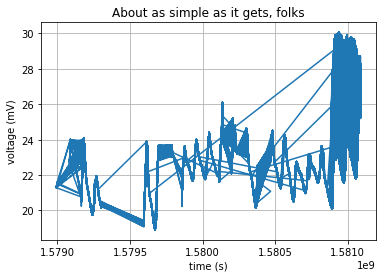

In [37]:
fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()